In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
path = "/content/drive/My Drive/DL_project/email/supervised_email_train.csv"

In [ ]:
email = pd.read_csv(path)

In [ ]:
emaildf = email[['Body']]

In [ ]:
emaildf.head()

,Body
0,FYI
1,"Hey Homey, I really do need to leave at 5:00. ..."
2,Attached is a revised Credit Watch listing for...
3,Continental has a price of $297.17(non-refunda...
4,You hurt my feelings bc you didn't wait for my...


In [ ]:
emaildf.shape

(83691, 1)

In [ ]:
emaildf.head()

,Body
0,FYI
1,"Hey Homey, I really do need to leave at 5:00. ..."
2,Attached is a revised Credit Watch listing for...
3,Continental has a price of $297.17(non-refunda...
4,You hurt my feelings bc you didn't wait for my...


In [ ]:
emaildf['Body'][1]

'Hey Homey, I really do need to leave at 5:00. If anything changes I will let you know. Thanks '

In [ ]:
emaildf['len'] = emaildf['Body'].map(lambda x : len(x))

<ipython-input-10-8ffd80cb58db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emaildf['len'] = emaildf['Body'].map(lambda x : len(x))


In [ ]:
emaildf.head()

,Body,len
0,FYI,5
1,"Hey Homey, I really do need to leave at 5:00. ...",94
2,Attached is a revised Credit Watch listing for...,536
3,Continental has a price of $297.17(non-refunda...,472
4,You hurt my feelings bc you didn't wait for my...,84


In [ ]:
emaildf['len'].describe()

count    83691.00000
mean       368.28622
std        573.52357
min          2.00000
25%         72.00000
50%        176.00000
75%        408.00000
max       5998.00000
Name: len, dtype: float64

In [ ]:
emaildf = emaildf[emaildf['len']<500]

In [ ]:
emaildf.shape

(66750, 2)

In [ ]:
emaildf = emaildf.reset_index()

In [ ]:
emaildf.head()

,index,Body,len
0,0,FYI,5
1,1,"Hey Homey, I really do need to leave at 5:00. ...",94
2,3,Continental has a price of $297.17(non-refunda...,472
3,4,You hurt my feelings bc you didn't wait for my...,84
4,8,THIS MEETING WILL TAKE PLACE IN 30C1,38


In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    #tokens = [w for w in newString.split() if not w in stop_words]
    #long_words=[]
    #for i in tokens:
    #    if len(i)>=3:                  #removing short word
    #        long_words.append(i)   
    #return (" ".join(long_words)).strip()
    return newString
#cleaned_text = []
#for t in data['Text']:
#    cleaned_text.append(text_cleaner(t))

In [ ]:
import re
def cleaning(row):
  row = row.replace(' . ','.')        
  row=re.sub("(\\t)", ' ', str(row)).lower() #remove escape charecters
  row=re.sub("(\\r)", ' ', str(row)).lower() 
  row=re.sub("(\\n)", ' ', str(row)).lower()
  row=re.sub("(__+)", ' ', str(row)).lower()   #remove _ if it occors more than one time consecutively
  row=re.sub("(--+)", ' ', str(row)).lower()   #remove - if it occors more than one time consecutively
  row=re.sub("(~~+)", ' ', str(row)).lower()   #remove ~ if it occors more than one time consecutively
  row=re.sub("(\+\++)", ' ', str(row)).lower()   #remove + if it occors more than one time consecutively
  row=re.sub("(\.\.+)", ' ', str(row)).lower()   #remove . if it occors more than one time consecutively
  row = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in row.split(" ")])
  row=re.sub(r"[<>()|&©ø\[\]\'\",;?~*!]", ' ', str(row)).lower() #remove <>()|&©ø"',;?~*!
  row=re.sub("(mailto:)", ' ', str(row)).lower() #remove mailto:
  row=re.sub(r"(\\x9\d)", ' ', str(row)).lower() #remove \x9* in text
  row=re.sub("([iI][nN][cC]\d+)", 'INC_NUM', str(row)).lower() #replace INC nums to INC_NUM
  row=re.sub("([cC][mM]\d+)|([cC][hH][gG]\d+)", 'CM_NUM', str(row)).lower() #replace CM# and CHG# to CM_NUM
  #row=re.sub("(\.\s+)", ' ', str(row)).lower() #remove full stop at end of words(not between)
  row=re.sub("(\-\s+)", ' ', str(row)).lower() #remove - at end of words(not between)
  row=re.sub("(\:\s+)", ' ', str(row)).lower() #remove : at end of words(not between)
  row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces

  #Replace any url as such https://abc.xyz.net/browse/sdf-5327 ====> abc.xyz.net
  try:
      url = re.search(r'((https*:\/*)([^\/\s]+))(.[^\s]+)', str(row))
      repl_url = url.group(3)
      row = re.sub(r'((https*:\/*)([^\/\s]+))(.[^\s]+)',repl_url, str(row))
  except:
      pass #there might be emails with no url in them


  row = re.sub("(\s+)",' ',str(row)).lower() #remove multiple spaces

  #Should always be last
  #row=re.sub("(\s+.\s+)", ' ', str(row)).lower() #remove any single charecters hanging between 2 spaces
  return row

In [ ]:
emaildf['clean_text'] = emaildf['Body'].map(lambda x : cleaning(x))

In [ ]:
emaildf['clean_text'][2]

'continental has price of $297.17 non-refundable for the following roundtrip flights depart houston nov. 1:40 pm 4:08 pm depart chicago nov. 11 11:05 am 1:38 pm united has price of $259.12 non-refundable for the following roundtrip flights depart houston nov. 12:50 pm 3:15 pm or 2:40 pm 5:02 pm depart chicago nov. 11 10:35 am 1:11 pm let me know what you decide. thank you irena hogan sr. administrative assistant enron americas 713 853-6143'

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.cluster.util import cosine_distance

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def sentence_similarity(sent1, sent2, stopwords = None):
  if stopwords is None:
    stopwords = []
  sent1 = [w.lower() for w in sent1]
  sent2 = [w.lower() for w in sent2]
  all_words = list(set(sent1 + sent2))

  vector1 = [0] * len(all_words)
  vector2 = [0] *len(all_words)

  for w in sent1:
    if w in stopwords:
      continue
    vector1[all_words.index(w)] += 1

  for w in sent2:
    if w in stopwords:
      continue
    vector2[all_words.index(w)] += 1    

  return 1 - cosine_distance(vector1,vector2)

In [ ]:
emaildf['sentences'] = emaildf['clean_text'].map(lambda x : x.split('. '))

In [ ]:
def most_similar(clean_text):
  sentences = clean_text.split('.')
  dict1 = {}
  for i in sentences:
    similarity = sentence_similarity(clean_text, i)
    dict1[i] = similarity
  a = max(dict1, key=dict1.get)  
  return(a)    

In [ ]:
a = most_similar(emaildf['clean_text'][1000])

/usr/local/lib/python3.8/dist-packages/nltk/cluster/util.py:130: RuntimeWarning: invalid value encountered in true_divide
  return 1 - (numpy.dot(u, v) / (sqrt(numpy.dot(u, u)) * sqrt(numpy.dot(v, v))))


In [ ]:
a

'the preliminary violation memos for 112101 have been published and are available for viewing on the erv erv'

In [ ]:
emaildf['summary'] = emaildf['clean_text'].map(lambda x : most_similar(x))

In [ ]:
emaildf.head()

,index,Body,len,clean_text,sentences,summary
0,0,FYI,5,fyi,[ fyi ],fyi
1,1,"Hey Homey, I really do need to leave at 5:00. ...",94,hey homey really do need to leave at 5:00. if ...,"[hey homey really do need to leave at 5:00, if...",if anything changes will let you know
2,3,Continental has a price of $297.17(non-refunda...,472,continental has price of $297.17 non-refundabl...,[continental has price of $297.17 non-refundab...,12 non-refundable for the following roundtrip ...
3,4,You hurt my feelings bc you didn't wait for my...,84,you hurt my feelings bc you did not wait for m...,[you hurt my feelings bc you did not wait for ...,you hurt my feelings bc you did not wait for m...
4,8,THIS MEETING WILL TAKE PLACE IN 30C1,38,this meeting will take place in 30c1,[ this meeting will take place in 30c1 ],this meeting will take place in 30c1


In [ ]:
from bs4 import BeautifulSoup
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub("(\s+)",' ',str(newString)).lower()
    #tokens = [w for w in newString.split() if not w in stop_words]
    #long_words=[]
    #for i in tokens:
    #    if len(i)>=3:                  #removing short word
    #        long_words.append(i)   
    #return (" ".join(long_words)).strip()
    return newString
#cleaned_text = []
#for t in data['Text']:
#    cleaned_text.append(text_cleaner(t))

In [ ]:
#Cleaning text and summary
emaildf['clean_text'] = emaildf['clean_text'].map(lambda x : text_cleaner(x))
emaildf['clean_summary'] = emaildf['summary'].map(lambda x : text_cleaner(x))

/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:270: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [ ]:
emaildf['clean_summary'] = emaildf['clean_summary'].apply(lambda x : '_START_ '+ x + ' _END_')

In [ ]:
text_count = []
summary_count = []

In [ ]:
for sent in emaildf['clean_text']:
    text_count.append(len(sent.split()))
for sent in emaildf['clean_summary']:
    summary_count.append(len(sent.split()))

In [ ]:
graph_df= pd.DataFrame()
graph_df['text']=text_count
graph_df['summary']=summary_count

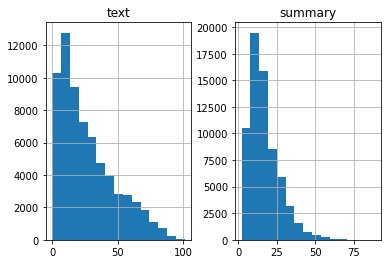

In [ ]:
import matplotlib.pyplot as plt

graph_df.hist(bins = 15)
plt.show()


In [ ]:
#Check how much % of summary have 0-10 words
cnt=0
for i in emaildf['clean_summary']:
    if(len(i.split())<=10):
        cnt=cnt+1
print(cnt/len(emaildf['clean_summary']))

0.2990861423220974


In [ ]:
#Check how much % of text have 0-40 words
cnt=0
for i in emaildf['clean_text']:
    if(len(i.split())<=40):
        cnt=cnt+1
print(cnt/len(emaildf['clean_text']))

0.7623520599250936


In [ ]:
#Model to summarize the text between 0-15 words for Summary and 0-100 words for Text
max_text_len=40
max_summary_len=10

In [ ]:
#Select the Summaries and Text between max len defined above

cleaned_text =np.array(emaildf['clean_text'])
cleaned_summary=np.array(emaildf['clean_summary'])

short_text=[]
short_summary=[]

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split())<=max_summary_len and len(cleaned_text[i].split())<=max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
        
post_pre=pd.DataFrame({'text':short_text,'summary':short_summary})

In [ ]:
post_pre.head(2)

,text,summary
0,fyi,_START_ fyi _END_
1,hey homey really do need to leave at if anythi...,_START_ if anything changes will let you know ...


In [ ]:
post_pre.shape

(19805, 2)

In [ ]:
#Add sostok and eostok at 
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')

In [ ]:
post_pre.head(2)

,text,summary
0,fyi,sostok _START_ fyi _END_ eostok
1,hey homey really do need to leave at if anythi...,sostok _START_ if anything changes will let yo...


In [ ]:
post_pre['text_len'] = post_pre['text'].map(lambda x : len(x.split()))

In [ ]:
post_pre.head()

,text,summary,text_len
0,fyi,sostok _START_ fyi _END_ eostok,1
1,hey homey really do need to leave at if anything changes will let you know thanks,sostok _START_ if anything changes will let you know _END_ eostok,16
2,this meeting will take place in c,sostok _START_ this meeting will take place in c _END_ eostok,7
3,i hear you my sistah you are so right however life is good smile,sostok _START_ you are so right however life is good _END_ eostok,14
4,patrice petro has been added thank you stephanie x,sostok _START_ patrice petro has been added _END_ eostok,9


In [ ]:
post_pre[post_pre['text_len']>30]

,text,summary,text_len
7,thank you for agreeing to attend the sr directordirector focus group meeting scheduled for wednesday october the focus group will begin at a m p m in ebecn c lunch will be provided sally alvarez m...,sostok _START_ the focus group will begin at a _END_ eostok,38
137,i will be leaving at noon today fyi will be in until p m tomorrow meet with hr at thanks alice wright enron wholesale services legal smith st eb a houston texas tel fax alice wright enron com,sostok _START_ alice wright enron wholesale services legal smith st _END_ eostok,38
307,i just got back from ubs orientation and will start work on it now will let you know when am done should be able to finish before p m if there are not too many deals cecilia,sostok _START_ if there are not too many deals cecilia _END_ eostok,37
334,no ancillary schedules awarded variances detected variances detected in load schedule log messages parsing file h netco finalsha finalsload txt load schedule variance found in table loadschedule d...,sostok _START_ txt load schedule variance found in table loadschedule _END_ eostok,37
528,just spoke to cathy moehlman in treasury she said that she ahs the payment still does not have the payment she is going to check with ap right now let you know when hear sp,sostok _START_ still does not have the payment _END_ eostok,35
559,mike if you need johnspeak up now if not he is gone on tuesday let gary smith know today if you want him thanks dan sent from my blackberry wireless handheld www blackberry net,sostok _START_ if not he is gone on tuesday _END_ eostok,34
571,danny this is most unfortunate news release kvisle is not current on our consortium plans to pitch bcfd pipeline bound to be some media flack on this sent from my blackberry wireless handheld www ...,sostok _START_ bound to be some media flack on this _END_ eostok,36
606,cara have deleted all of the routes for palo verde on the th call me if you are still having problems would like to get you going on testing today will do whatever can to resolve your issues regar...,sostok _START_ will do whatever can to resolve your issues _END_ eostok,40
771,send you the mark report if want to you are reading your e mails backwards was just being brat just off of the couch for few minutes hope you are happy,sostok _START_ send you the mark report if want to _END_ eostok,31
834,i am trying to drive and e mail at the same time it is not working very well and leave my school alone sent from my blackberry wireless handheld www blackberry net,sostok _START_ sent from my blackberry wireless handheld www _END_ eostok,32


In [ ]:
post_pre = post_pre[:4000]

In [ ]:
post_pre.shape

(4000, 2)

In [ ]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(np.array(post_pre['text']),np.array(post_pre['summary']),test_size=0.1,random_state=0,shuffle=True)

In [ ]:
#prepare a tokenizer for reviews on training data
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_text_len, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_text_len, padding='post')

x_voc   =  len(x_tokenizer.word_index) +1

In [ ]:
x_voc

3776

In [ ]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_summary_len, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_summary_len, padding='post')

y_voc  =   len(y_tokenizer.word_index) +1

In [ ]:
y_voc

2916

In [ ]:
##Lets tokenize the text to get the vocab count , you can use Spacy here also
#
#from keras.preprocessing.text import Tokenizer 
#from keras_preprocessing.sequence import pad_sequences
#
##prepare a tokenizer for reviews on training data
#x_tokenizer = Tokenizer() 
#x_tokenizer.fit_on_texts(list(x_tr))

In [ ]:
#thresh=1
#cnt=0
#tot_cnt=0
#freq=0
#tot_freq=0
#
#for key,value in x_tokenizer.word_counts.items():
#    tot_cnt=tot_cnt+1
#    tot_freq=tot_freq+value
#    if(value<thresh):
#        cnt=cnt+1
#        freq=freq+value
#    
#print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
#print("Total Coverage of rare words:",(freq/tot_freq)*100)

In [ ]:
##prepare a tokenizer for reviews on training data
#x_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
#x_tokenizer.fit_on_texts(list(x_tr))
#
##convert text sequences into integer sequences (i.e one-hot encodeing all the words)
#x_tr_seq    =   x_tokenizer.texts_to_sequences(x_tr) 
#x_val_seq   =   x_tokenizer.texts_to_sequences(x_val)
#
##padding zero upto maximum length
#x_tr    =   pad_sequences(x_tr_seq,  maxlen=max_text_len, padding='post')
#x_val   =   pad_sequences(x_val_seq, maxlen=max_text_len, padding='post')
#
##size of vocabulary ( +1 for padding token)
#x_voc   =  x_tokenizer.num_words + 1
#
#print("Size of vocabulary in X = {}".format(x_voc))

In [ ]:
##prepare a tokenizer for reviews on training data
#y_tokenizer = Tokenizer()   
#y_tokenizer.fit_on_texts(list(y_tr))

In [ ]:
#thresh=1
#
#cnt=0
#tot_cnt=0
#freq=0
#tot_freq=0
#
#for key,value in y_tokenizer.word_counts.items():
#    tot_cnt=tot_cnt+1
#    tot_freq=tot_freq+value
#    if(value<thresh):
#        cnt=cnt+1
#        freq=freq+value
#    
#print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
#print("Total Coverage of rare words:",(freq/tot_freq)*100)

In [ ]:
##prepare a tokenizer for reviews on training data
#y_tokenizer = Tokenizer(num_words=tot_cnt-cnt) 
#y_tokenizer.fit_on_texts(list(y_tr))
#
##convert text sequences into integer sequences (i.e one hot encode the text in Y)
#y_tr_seq    =   y_tokenizer.texts_to_sequences(y_tr) 
#y_val_seq   =   y_tokenizer.texts_to_sequences(y_val) 
#
##padding zero upto maximum length
#y_tr    =   pad_sequences(y_tr_seq, maxlen=max_summary_len, padding='post')
#y_val   =   pad_sequences(y_val_seq, maxlen=max_summary_len, padding='post')
#
##size of vocabulary
#y_voc  =   y_tokenizer.num_words +1
#print("Size of vocabulary in Y = {}".format(y_voc))

In [ ]:
#ind=[]
#for i in range(len(y_tr)):
#    cnt=0
#    for j in y_tr[i]:
#        if j!=0:
#            cnt=cnt+1
#    if(cnt==2):
#        ind.append(i)
#
#y_tr=np.delete(y_tr,ind, axis=0)
#x_tr=np.delete(x_tr,ind, axis=0)

In [ ]:
#ind=[]
#for i in range(len(y_val)):
#    cnt=0
#    for j in y_val[i]:
#        if j!=0:
#            cnt=cnt+1
#    if(cnt==2):
#        ind.append(i)
#
#y_val=np.delete(y_val,ind, axis=0)
#x_val=np.delete(x_val,ind, axis=0)

In [ ]:
from keras import layers

In [ ]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 200
embedding_dim=200


# Encoder
encoder_inputs = Input(shape=(max_text_len,))
#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model 
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()

Size of vocabulary from the w2v model = 3776
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 200)      755200      ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 40, 200),    320800      ['embedding[0][0]']              
                                 (None, 200),                                                     
                                 (None, 200)]                                                     
                                                 

In [ ]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)

In [ ]:
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=128, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Epoch 1/50
29/29 [==============================] - 76s 2s/step - loss: 5.0697 - val_loss: 3.8117
Epoch 2/50
29/29 [==============================] - 63s 2s/step - loss: 4.1172 - val_loss: 3.4220
Epoch 3/50
29/29 [==============================] - 61s 2s/step - loss: 3.7500 - val_loss: 3.1439
Epoch 4/50
29/29 [==============================] - 63s 2s/step - loss: 3.7491 - val_loss: 3.1230
Epoch 5/50
29/29 [==============================] - 60s 2s/step - loss: 3.4682 - val_loss: 2.9644
Epoch 6/50
29/29 [==============================] - 63s 2s/step - loss: 3.3702 - val_loss: 2.9238
Epoch 7/50
29/29 [==============================] - 60s 2s/step - loss: 3.3202 - val_loss: 2.8341
Epoch 8/50
29/29 [==============================] - 62s 2s/step - loss: 3.2118 - val_loss: 2.7710
Epoch 9/50
29/29 [==============================] - 61s 2s/step - loss: 3.1252 - val_loss: 2.7558
Epoch 10/50
29/29 [==============================] - 63s 2s/step - loss: 3.0520 - val_loss: 2.6868
Epoch 11/50
29/29 [

In [ ]:
import pickle
#pickle.dump(history, open('/content/drive/My Drive/DL_project/model.pkl', 'wb'))

In [ ]:
import pickle
history = pickle.load(open('/content/drive/My Drive/DL_project/model.pkl', 'rb'))

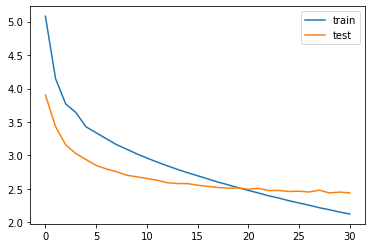

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_text_len,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (max_summary_len-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
len(x_tr)

3600

In [ ]:
text = []
summary_original = []
predicted = []
for i in range(0,100):
  #text.append(seq2text(x_tr[i]))
  #summary_original.append(seq2summary(y_tr[i]))
  #predicted.append(decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("Review:",seq2text(x_tr[i]))
    print("Original summary:",seq2summary(y_tr[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,max_text_len)))
    print("\n")

Review: dotect ect enron comgenstatepestatusrecent c 
Original summary: start comgenstatepestatusrecent end 
1/1 [==============================] - 0s 27ms/step
Predicted summary:  start thanks end


Review: interesting stuff 
Original summary: start interesting stuff end 
1/1 [==============================] - 0s 20ms/step
Predicted summary:  start thanks end


Review: i will be providing you these files today 
Original summary: i will be providing you these files today end 
1/1 [==============================] - 0s 22ms/step
Predicted summary:  start you are you you end


Review: my country club 
Original summary: start my country club end 
1/1 [==============================] - 0s 21ms/step
Predicted summary:  start please see me end


Review: here are the settle thanks john 
Original summary: start here are the settle thanks end 
1/1 [==============================] - 0s 21ms/step
Predicted summary:  start you are you you end


Review: talked to edison about getting meeting with cr

In [ ]:
df = pd.DataFrame(list(zip(text, summary_original, predicted)),
               columns =['text', 'original_summary', 'predicted_summary'])

In [ ]:
df['text_len'] = df['text'].map(lambda x : len(x.split()))

In [ ]:
df['pred_len'] = df['predicted_summary'].map(lambda x : len(x.split()))

In [ ]:
df.head()

,text,original_summary,predicted_summary,text_len,pred_len
0,dotect ect enron comgenstatepestatusrecent c,start comgenstatepestatusrecent end,start thanks end,5,3
1,interesting stuff,start interesting stuff end,start thanks end,2,3
2,i will be providing you these files today,i will be providing you these files today end,start you are you you end,8,6
3,my country club,start my country club end,start please see me end,3,5
4,here are the settle thanks john,start here are the settle thanks end,start you are you you end,6,6


In [ ]:
df[df['pred_len'] > 5]

,text,original_summary,predicted_summary,text_len,pred_len
2,i will be providing you these files today,i will be providing you these files today end,start you are you you end,8,6
4,here are the settle thanks john,start here are the settle thanks end,start you are you you end,6,6
5,talked to edison about getting meeting with craver they are going to get back to me best jeff,talked to edison about getting meeting with craver end,start i you are you know end,18,7
8,how close are you tot he escalators,start how close are you tot he escalators end,start you are you you end,7,6
9,jerry is crazy look what time he sent this out,start look what time he sent this out end,start you are you going to me end,10,8
...,...,...,...,...,...
95,good for me,start good for me end,start please review the attached outage report end,3,8
96,per our phone conversation looks like ed was copied yesterday also will get with you after have more information,will get with you after have more information end,start i you know to me end,19,7
97,am right about the wic cig and williams,am right about the wic cig and williams end,start i am be in the office end,8,8
98,whatever are you going to workout,start are you going to workout end,start you are you going end,6,6


In [ ]:
def sentence_similarity(sent1, sent2, stopwords = None):
  if stopwords is None:
    stopwords = []
  sent1 = [w.lower() for w in sent1]
  sent2 = [w.lower() for w in sent2]
  all_words = list(set(sent1 + sent2))

  vector1 = [0] * len(all_words)
  vector2 = [0] *len(all_words)

  for w in sent1:
    if w in stopwords:
      continue
    vector1[all_words.index(w)] += 1

  for w in sent2:
    if w in stopwords:
      continue
    vector2[all_words.index(w)] += 1    

  return 1 - cosine_distance(vector1,vector2)

In [ ]:
sentence_similarity(df['predicted_summary'][0],df['original_summary'][0])

0.8369004806348969

In [ ]:
df['similarity'] = df.apply(lambda x : sentence_similarity(x['predicted_summary'],x['original_summary']), axis=1)

In [ ]:
df.head()

,text,original_summary,predicted_summary,text_len,pred_len,similarity
0,dotect ect enron comgenstatepestatusrecent c,start comgenstatepestatusrecent end,start thanks end,5,3,0.836900
1,interesting stuff,start interesting stuff end,start thanks end,2,3,0.866811
2,i will be providing you these files today,i will be providing you these files today end,start you are you you end,8,6,0.789689
3,my country club,start my country club end,start please see me end,3,5,0.678986
4,here are the settle thanks john,start here are the settle thanks end,start you are you you end,6,6,0.713847


In [ ]:
df.to_pickle("/content/drive/My Drive/DL_project/prediction.pickle")

In [ ]:
df2 = df[df['pred_len'] > 7]

In [ ]:
df2.shape

(32, 6)

In [ ]:
df2.nlargest(50,'similarity')

,text,original_summary,predicted_summary,text_len,pred_len,similarity
47,please update with other info jim,start please update with other info end,start please review the attached outage report end,6,8,0.955771
11,the meeting is in,start the meeting is in end,start i am be in the office end,4,8,0.930162
42,the most up to date informative site available,the most up to date informative site available end,start i am be in the office end,8,8,0.928756
91,sorry found typo while doing my variances you will need to use this schedule nancy,start sorry found typo while doing my variances end,start you are you going to me end,15,8,0.927685
78,please see attached regards tm,start please see attached end,start please see me in been report end,5,8,0.906731
37,please visit our ets it newsletter at www ets enron comitnewslett,please visit our ets it newsletter at www end,start please review the attached outage report end,11,8,0.906583
18,you like,start you like end,start i am be in the corp end,2,8,0.902975
20,i am sorry my sugar didn t please forgive me if you need them let me know will get them to you some how love you the pigs,start if you need them let me know end,start you are you going to me end,28,8,0.901605
97,am right about the wic cig and williams,am right about the wic cig and williams end,start i am be in the office end,8,8,0.898472
76,kathy will be on vacation this afternoon thanks richard,start kathy will be on vacation this afternoon end,start i am be in the office end,9,8,0.896026
